In [1]:
# Importing necessary libraries
import cv2
import numpy as np
import math as m
import random

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img_globe=cv2.imread("Globe.png",0)
img_nautilus=cv2.imread("Nautilus.png",0)

In [39]:
def sigma(image): # function to compute the sigma values. It returns the matrix for all sigmas.
    x,y=np.shape(image)
    a=2
    b=((y)**2)/2*(np.log(200))
    
    sig=np.zeros((x,y))
    
    for p in range(x):
        for n in range(y):
            sig[p,n]=a*m.exp(-((p-x/2)**2 +(n-y/2)**2)/b)
    return sig
                       

In [48]:
def kernel(sigma):# Computes the kernel matrix

            limit=m.ceil(6*sigma+1)
            if limit%2==0:
                limit=limit+1

            kernel_matrix=np.zeros((limit,limit))
            ran=limit/2
            ran=m.floor(ran)
            x,y=-ran,ran
            su=0
            for i in range(limit):
                for j in range(limit):
                    kernel_matrix[i][j]=(m.exp(-((x)**2+(y)**2)/(2*sigma**2)))/(2*m.pi*sigma**2)
                    x=x+1
                y=y-1
                x=-ran

            su=np.sum(kernel_matrix)
            kernel_matrix=kernel_matrix/su
        
            return kernel_matrix
            

In [57]:
sigma_mat=sigma(img_globe)
x,y=np.shape(img_globe)

kernel_size=[]
for i in range(x):
    for j in range(y):
        #kernel_mat=kernel(sigma_mat[i,j])
        kernel_size.append(np.shape(kernel(sigma_mat[i,j]))[0])

        
max_size=max(kernel_size)

pad=max_size//2
xout=x+2*pad
yout=y+2*pad

output=np.zeros((xout,yout))
output[pad:-pad,pad:-pad]=img_globe

final_img=np.zeros_like(output)

for i in range(pad,x+pad):
    for j in range(pad,x+pad):
        
        kernel_mat=kernel(sigma_mat[i-pad][j-pad])
        
        kshape=np.shape(kernel_mat)[0]//2
        
        intensity=img_globe[i-pad][j-pad]
        
        final_img[i-kshape:i+kshape+1,j-kshape:j+kshape+1]+=kernel_mat*intensity
        
output_img=np.zeros((x,y)) 
output_img=final_img[pad:-pad,pad:-pad]


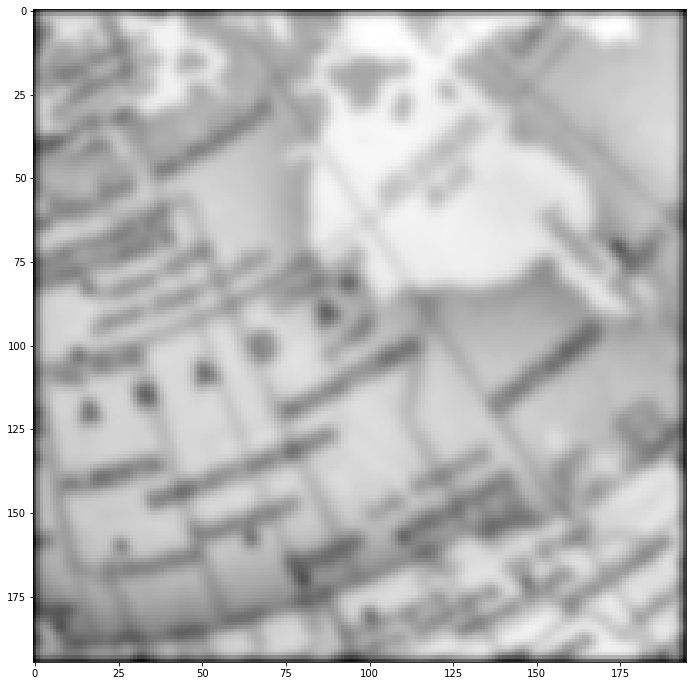

In [58]:
fig = plt.figure(figsize=(15, 12))
plt.imshow(output_img,cmap="gray")